<a href="https://colab.research.google.com/github/Ashfak1807/ETG-Summer-Olympics-Analysis/blob/main/Summer_Olympics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author: Syed Ashfak Ahmed**


## **Importing the packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
upload=files.upload()

Saving summer.csv to summer.csv


In [3]:
df = pd.read_csv("summer.csv")

In [4]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [5]:
df.head

<bound method NDFrame.head of        Year    City      Sport  ... Gender                       Event   Medal
0      1896  Athens   Aquatics  ...    Men              100M Freestyle    Gold
1      1896  Athens   Aquatics  ...    Men              100M Freestyle  Silver
2      1896  Athens   Aquatics  ...    Men  100M Freestyle For Sailors  Bronze
3      1896  Athens   Aquatics  ...    Men  100M Freestyle For Sailors    Gold
4      1896  Athens   Aquatics  ...    Men  100M Freestyle For Sailors  Silver
...     ...     ...        ...  ...    ...                         ...     ...
31160  2012  London  Wrestling  ...    Men                    Wg 84 KG  Bronze
31161  2012  London  Wrestling  ...    Men                    Wg 96 KG    Gold
31162  2012  London  Wrestling  ...    Men                    Wg 96 KG  Silver
31163  2012  London  Wrestling  ...    Men                    Wg 96 KG  Bronze
31164  2012  London  Wrestling  ...    Men                    Wg 96 KG  Bronze

[31165 rows x 9 colum

In [6]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


# **1.In how many cities Summer Olympics is held so far?**

In [8]:
print("The total number of cities summer olympics is held so far is :" ,len(df['City'].unique()))

The total number of cities summer olympics is held so far is : 22


# **2.Which sport is having most number of Gold Medals so far? (Top 5)**

Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Medal, dtype: int64


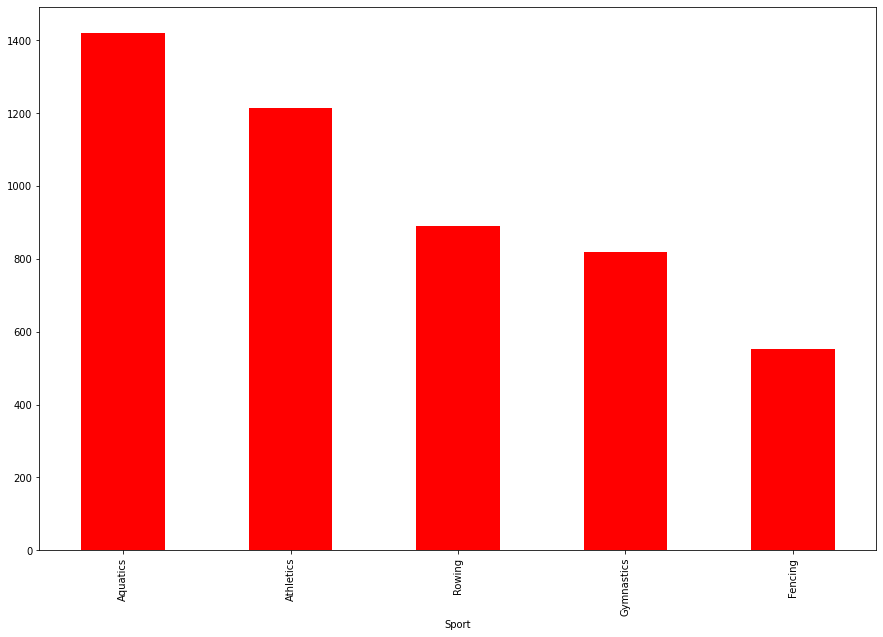

In [18]:
goldmedal = df[df['Medal'] == 'Gold']
goldmedal = goldmedal.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()
print(goldmedal)
goldmedal.plot.bar(figsize =(15,10),color='Red',y='Medals')

**Therefore aquatics sports has the most number of gold medals**

# **3.Which sport is having most number of medals so far? (Top 5)**

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64


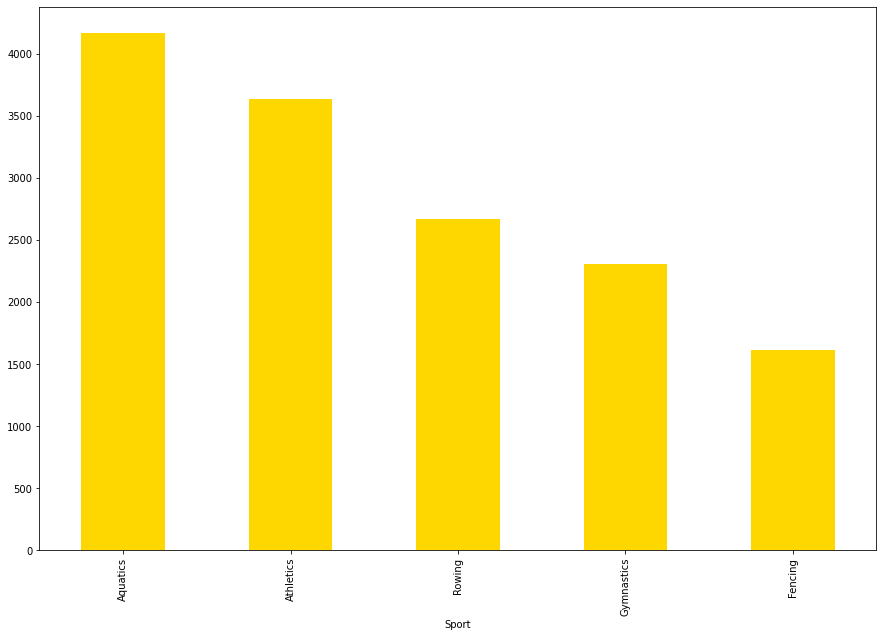

In [19]:
medals=df.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()
print(medals)
medals.plot.bar(figsize = (15, 10),color='Gold')

**Therefore aquatics sports has the most number of medals**

# **4.Which player has won most number of medals? (Top 5)**

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64


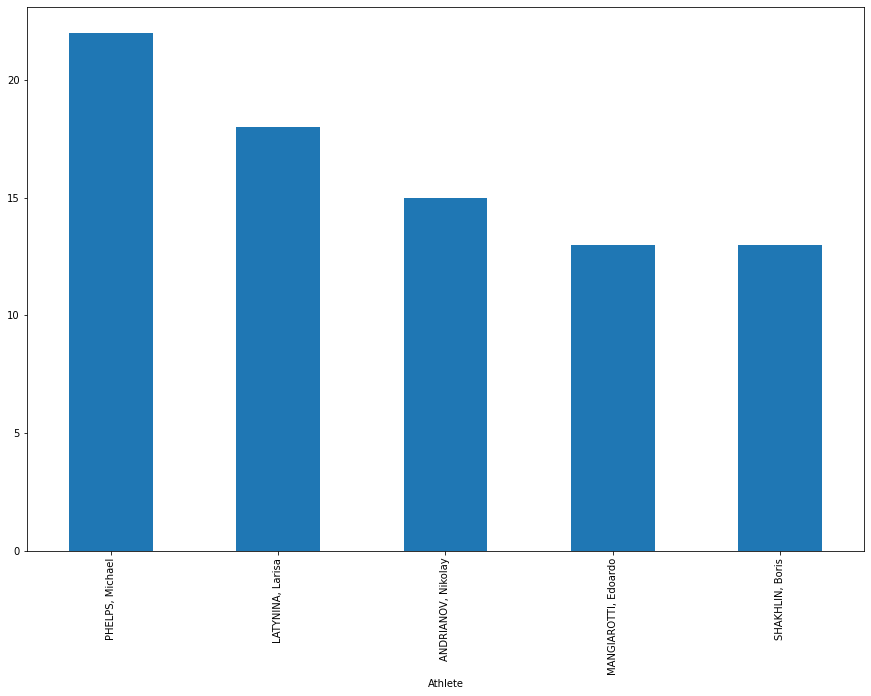

In [11]:
player = df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head()
print(player)
player.plot.bar(figsize= (15,10))

**Phelps,Michael has won the most number of medals which is 22.**

# **5.Which player has won most number Gold Medals of medals? (Top 5)**

Athlete
PHELPS, Michael     18
NURMI, Paavo         9
SPITZ, Mark          9
LEWIS, Carl          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64


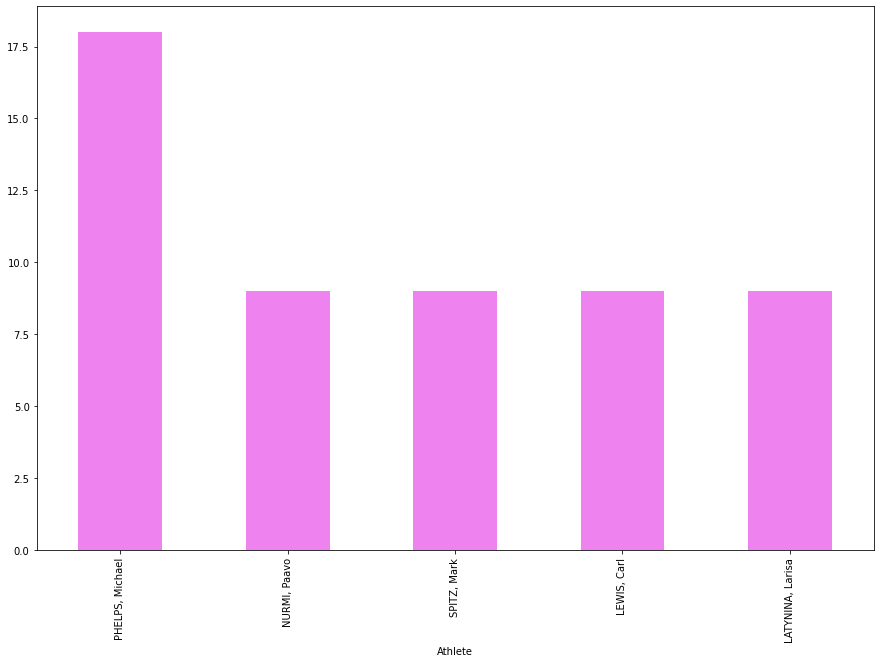

In [20]:
player_gold=df[df['Medal']=='Gold']
player_gold=player_gold.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head()
print(player_gold)
player_gold.plot.bar(figsize=(15,10),color='Violet')

**Phelps,Michael has won the most number of gold medals which is 18**

# **6.In which year India won first Gold Medal in Summer Olympics?**

In [13]:
india=df[df['Medal']=='Gold']
year=india.sort_values(['Year'],ascending=True)

gold=year[year['Country']=='IND'].iloc[0]

print("The year in which India won its first Gold Medal in Summer Olympics is ",gold['Year'] ,"\n")
print(gold)

The year in which India won its first Gold Medal in Summer Olympics is  1928 

Year                 1928
City            Amsterdam
Sport              Hockey
Discipline         Hockey
Athlete       CHAND, Dyan
Country               IND
Gender                Men
Event              Hockey
Medal                Gold
Name: 5513, dtype: object


# **7.Which event is most popular in terms on number of players? (Top 5)**

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64


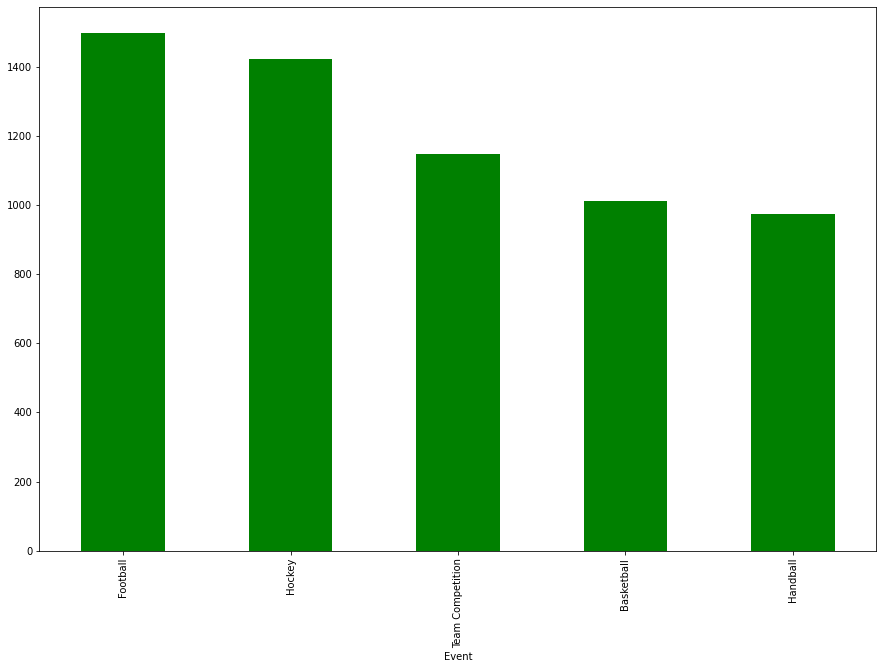

In [21]:
popular_event = df.groupby('Event').count()['Athlete'].sort_values(ascending=False).head()
print(popular_event)
popular_event.plot.bar(figsize = (15,10),color='Green')

**Therefore football is the most popular sport as there are 1497 number of players who had participated in it.**

# **8.Which sport is having most female Gold Medalists? (Top 5)**

Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Medal, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


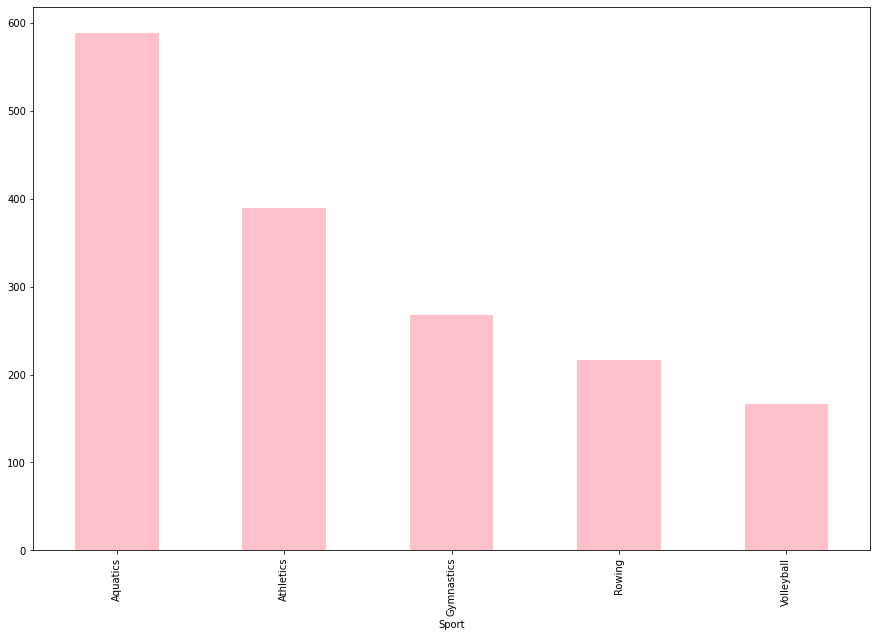

In [22]:
player_gold=df[df['Medal']=='Gold']
player_female_gold=player_gold[df['Gender']=='Women']
player_female_gold=player_female_gold.groupby('Sport').count()['Medal'].sort_values(ascending=False).head()
print(player_female_gold)
player_female_gold.plot.bar(figsize=(15,10),color='Pink')

**Therefore Aquatics sports has the most number of female gold medalists having 589 gold medals.**